# Resultados Finales TFM:

## Validación en conjunto de test 1: 434 frases.

## 1. Validación en el primer modelo pre-entrenado

In [15]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification

# Primer Modelo "fine-tuneado"
model_path = 'v4modelo_finbert_reentrenado'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

#conjunto de test: 434 frases
data = pd.read_excel("test.xlsx")
data = data[(data["ETIQUETA"]=="POSITIVO") | (data["ETIQUETA"]=="NEGATIVO") | (data["ETIQUETA"]=="NEUTRO")].reset_index(drop=True)
sentiment_map = {"negative": 'NEGATIVO', "neutral": 'NEUTRO', "positive": 'POSITIVO'}
sentiment_map_tone = {"Negative": 'NEGATIVO', "Neutral": 'NEUTRO', "Positive": 'POSITIVO'}
X = data['Body'].to_list()
y = data['ETIQUETA'].to_list()

preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    sentiment = max(scores, key=scores.get)
    probability = max(scores.values())
    preds.append(sentiment_map[sentiment])
    preds_proba.append(probability)
    
print(f'Accuracy-Score: {accuracy_score(y, preds)}')
print('Classification Report:')
print(classification_report(y, preds))
      


Accuracy-Score: 0.8525345622119815
Classification Report:
              precision    recall  f1-score   support

    NEGATIVO       0.87      1.00      0.93       159
      NEUTRO       0.99      0.56      0.72       133
    POSITIVO       0.77      0.96      0.86       142

    accuracy                           0.85       434
   macro avg       0.88      0.84      0.84       434
weighted avg       0.88      0.85      0.84       434



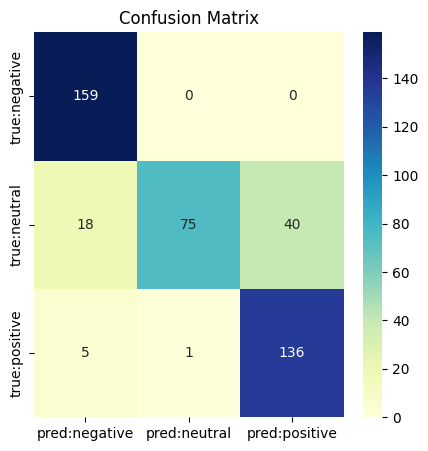

In [16]:
cm = confusion_matrix(y, preds, labels = ["NEGATIVO", "NEUTRO", "POSITIVO"])
cm_matrix = pd.DataFrame(data=cm, index=["true:negative", "true:neutral", "true:positive"], columns = ["pred:negative", "pred:neutral", "pred:positive"] )
plt.figure(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.show()

## 2. Validación en el FinBERT

In [17]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification

# Modelo FinBERT
model_path = 'binaires/finbert'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

#conjunto de test: 434 frases
data = pd.read_excel("test.xlsx")
data = data[(data["ETIQUETA"]=="POSITIVO") | (data["ETIQUETA"]=="NEGATIVO") | (data["ETIQUETA"]=="NEUTRO")].reset_index(drop=True)
sentiment_map = {"negative": 'NEGATIVO', "neutral": 'NEUTRO', "positive": 'POSITIVO'}
sentiment_map_tone = {"Negative": 'NEGATIVO', "Neutral": 'NEUTRO', "Positive": 'POSITIVO'}
X = data['Body'].to_list()
y = data['ETIQUETA'].to_list()

preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    sentiment = max(scores, key=scores.get)
    probability = max(scores.values())
    preds.append(sentiment_map[sentiment])
    preds_proba.append(probability)
    
print(f'Accuracy-Score: {accuracy_score(y, preds)}')
print('Classification Report:')
print(classification_report(y, preds))
      


Accuracy-Score: 0.7649769585253456
Classification Report:
              precision    recall  f1-score   support

    NEGATIVO       0.86      0.96      0.91       159
      NEUTRO       0.64      0.61      0.63       133
    POSITIVO       0.75      0.69      0.72       142

    accuracy                           0.76       434
   macro avg       0.75      0.75      0.75       434
weighted avg       0.76      0.76      0.76       434



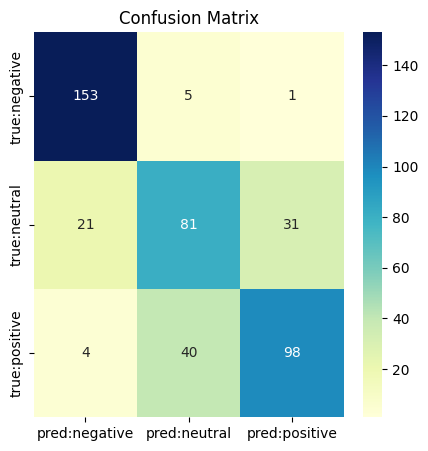

In [18]:
cm = confusion_matrix(y, preds, labels = ["NEGATIVO", "NEUTRO", "POSITIVO"])
cm_matrix = pd.DataFrame(data=cm, index=["true:negative", "true:neutral", "true:positive"], columns = ["pred:negative", "pred:neutral", "pred:positive"] )
plt.figure(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.show()

## 3. Validación con el modelo del BS

In [30]:
data = pd.read_excel("final_results_api_en_test.xlsx")
y = data["ETIQUETA"]
preds = data["results sent api"]
print(f'Accuracy-Score: {accuracy_score(y, preds)}')
print('Classification Report:')
print(classification_report(y, preds))

Accuracy-Score: 0.5990783410138248
Classification Report:
              precision    recall  f1-score   support

    NEGATIVO       0.88      0.47      0.61       159
      NEUTRO       0.45      0.86      0.59       133
    POSITIVO       0.77      0.49      0.60       142

    accuracy                           0.60       434
   macro avg       0.70      0.61      0.60       434
weighted avg       0.71      0.60      0.60       434



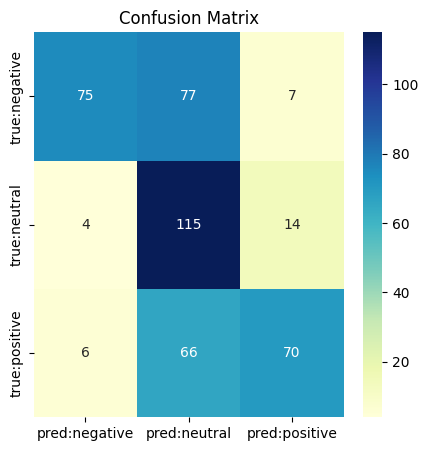

In [31]:
cm = confusion_matrix(y, preds, labels = ["NEGATIVO", "NEUTRO", "POSITIVO"])
cm_matrix = pd.DataFrame(data=cm, index=["true:negative", "true:neutral", "true:positive"], columns = ["pred:negative", "pred:neutral", "pred:positive"] )
plt.figure(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.show()

## 4. Validación en el segundo modelo "fine-tuneado"

In [19]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification

# 2º Modelo "Fine-Tuneado"
model_path = 'v1final_model'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

#conjunto de test: 434 frases
data = pd.read_excel("test.xlsx")
data = data[(data["ETIQUETA"]=="POSITIVO") | (data["ETIQUETA"]=="NEGATIVO") | (data["ETIQUETA"]=="NEUTRO")].reset_index(drop=True)
sentiment_map = {"negative": 'NEGATIVO', "neutral": 'NEUTRO', "positive": 'POSITIVO'}
sentiment_map_tone = {"Negative": 'NEGATIVO', "Neutral": 'NEUTRO', "Positive": 'POSITIVO'}
X = data['Body'].to_list()
y = data['ETIQUETA'].to_list()

preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    sentiment = max(scores, key=scores.get)
    probability = max(scores.values())
    preds.append(sentiment_map[sentiment])
    preds_proba.append(probability)
    
print(f'Accuracy-Score: {accuracy_score(y, preds)}')
print('Classification Report:')
print(classification_report(y, preds))
      


Accuracy-Score: 0.9124423963133641
Classification Report:
              precision    recall  f1-score   support

    NEGATIVO       0.91      1.00      0.95       159
      NEUTRO       0.95      0.83      0.88       133
    POSITIVO       0.89      0.89      0.89       142

    accuracy                           0.91       434
   macro avg       0.91      0.91      0.91       434
weighted avg       0.91      0.91      0.91       434



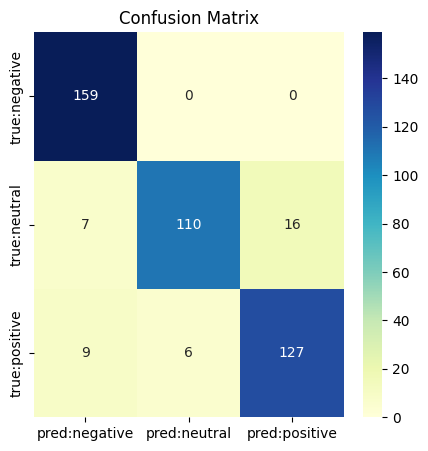

In [20]:
cm = confusion_matrix(y, preds, labels = ["NEGATIVO", "NEUTRO", "POSITIVO"])
cm_matrix = pd.DataFrame(data=cm, index=["true:negative", "true:neutral", "true:positive"], columns = ["pred:negative", "pred:neutral", "pred:positive"] )
plt.figure(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.show()

## Validación en conjunto de test 2: párrafos y artículos

## 1. Segundo modelo "fine-tuneado"

In [21]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification

# 2º Modelo "Fine-Tuneado"
model_path = 'v1final_model'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

#conjunto de test: 442 párrafos
data = pd.read_excel("test_news.xlsx")
data = data[(data["ETIQUETA"]=="POSITIVO") | (data["ETIQUETA"]=="NEGATIVO") | (data["ETIQUETA"]=="NEUTRO")].reset_index(drop=True)
sentiment_map = {"negative": 'NEGATIVO', "neutral": 'NEUTRO', "positive": 'POSITIVO'}
sentiment_map_tone = {"Negative": 'NEGATIVO', "Neutral": 'NEUTRO', "Positive": 'POSITIVO'}
X = data['Body'].to_list()
y = data['ETIQUETA'].to_list()

preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    sentiment = max(scores, key=scores.get)
    probability = max(scores.values())
    preds.append(sentiment_map[sentiment])
    preds_proba.append(probability)
    
print(f'Accuracy-Score: {accuracy_score(y, preds)}')
print('Classification Report:')
print(classification_report(y, preds))
      


Accuracy-Score: 0.8190045248868778
Classification Report:
              precision    recall  f1-score   support

    NEGATIVO       0.91      0.89      0.90       140
      NEUTRO       0.68      0.76      0.72       119
    POSITIVO       0.85      0.80      0.83       183

    accuracy                           0.82       442
   macro avg       0.81      0.82      0.82       442
weighted avg       0.82      0.82      0.82       442



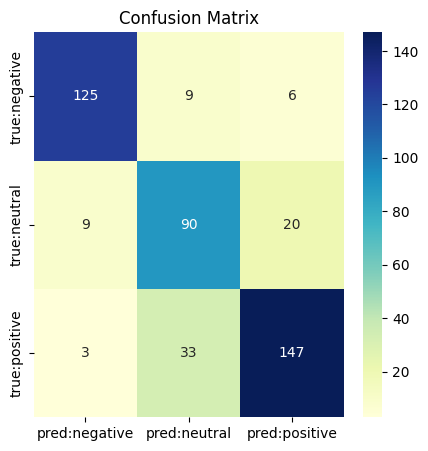

In [22]:
cm = confusion_matrix(y, preds, labels = ["NEGATIVO", "NEUTRO", "POSITIVO"])
cm_matrix = pd.DataFrame(data=cm, index=["true:negative", "true:neutral", "true:positive"], columns = ["pred:negative", "pred:neutral", "pred:positive"] )
plt.figure(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.show()

## 2. Modelo FinBERT

In [23]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification

# Modelo FinBERT
model_path = 'binaires/finbert'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

#conjunto de test: 
data = pd.read_excel("test_news.xlsx")
data = data[(data["ETIQUETA"]=="POSITIVO") | (data["ETIQUETA"]=="NEGATIVO") | (data["ETIQUETA"]=="NEUTRO")].reset_index(drop=True)
sentiment_map = {"negative": 'NEGATIVO', "neutral": 'NEUTRO', "positive": 'POSITIVO'}
sentiment_map_tone = {"Negative": 'NEGATIVO', "Neutral": 'NEUTRO', "Positive": 'POSITIVO'}
X = data['Body'].to_list()
y = data['ETIQUETA'].to_list()

preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    sentiment = max(scores, key=scores.get)
    probability = max(scores.values())
    preds.append(sentiment_map[sentiment])
    preds_proba.append(probability)
    
print(f'Accuracy-Score: {accuracy_score(y, preds)}')
print('Classification Report:')
print(classification_report(y, preds))
      


Accuracy-Score: 0.7036199095022625
Classification Report:
              precision    recall  f1-score   support

    NEGATIVO       0.76      0.96      0.85       140
      NEUTRO       0.50      0.56      0.53       119
    POSITIVO       0.85      0.60      0.70       183

    accuracy                           0.70       442
   macro avg       0.70      0.71      0.69       442
weighted avg       0.72      0.70      0.70       442



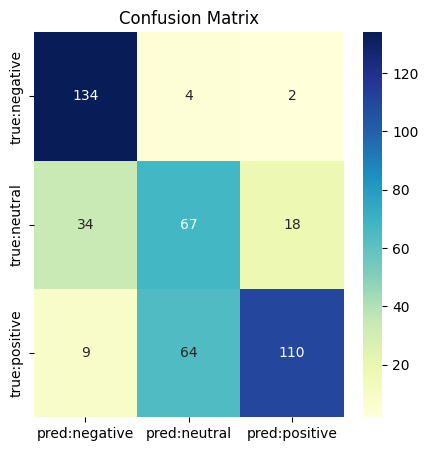

In [24]:
cm = confusion_matrix(y, preds, labels = ["NEGATIVO", "NEUTRO", "POSITIVO"])
cm_matrix = pd.DataFrame(data=cm, index=["true:negative", "true:neutral", "true:positive"], columns = ["pred:negative", "pred:neutral", "pred:positive"] )
plt.figure(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.show()

## 3. Primer Modelo Fine-Tuneado

In [25]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification

# Primer Modelo "fine-tuneado"
model_path = 'v4modelo_finbert_reentrenado'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

#conjunto de test: 
data = pd.read_excel("test_news.xlsx")
data = data[(data["ETIQUETA"]=="POSITIVO") | (data["ETIQUETA"]=="NEGATIVO") | (data["ETIQUETA"]=="NEUTRO")].reset_index(drop=True)
sentiment_map = {"negative": 'NEGATIVO', "neutral": 'NEUTRO', "positive": 'POSITIVO'}
sentiment_map_tone = {"Negative": 'NEGATIVO', "Neutral": 'NEUTRO', "Positive": 'POSITIVO'}
X = data['Body'].to_list()
y = data['ETIQUETA'].to_list()

preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    sentiment = max(scores, key=scores.get)
    probability = max(scores.values())
    preds.append(sentiment_map[sentiment])
    preds_proba.append(probability)
    
print(f'Accuracy-Score: {accuracy_score(y, preds)}')
print('Classification Report:')
print(classification_report(y, preds))
      


Accuracy-Score: 0.7285067873303167
Classification Report:
              precision    recall  f1-score   support

    NEGATIVO       0.71      0.95      0.81       140
      NEUTRO       0.59      0.22      0.32       119
    POSITIVO       0.77      0.89      0.83       183

    accuracy                           0.73       442
   macro avg       0.69      0.69      0.65       442
weighted avg       0.70      0.73      0.69       442



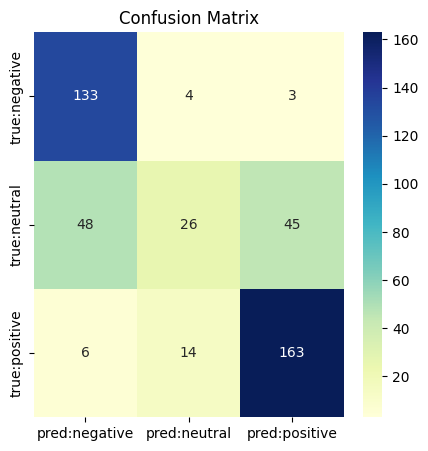

In [26]:
cm = confusion_matrix(y, preds, labels = ["NEGATIVO", "NEUTRO", "POSITIVO"])
cm_matrix = pd.DataFrame(data=cm, index=["true:negative", "true:neutral", "true:positive"], columns = ["pred:negative", "pred:neutral", "pred:positive"] )
plt.figure(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.show()